## Plot one trace of plate comparison for p38:Bosutinib

In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# get data for each plate type 

plate_list = ('UV', 'NB', 'COC')

final_data_prot = list()
final_data_buff = list()

for plate in plate_list:
    # load data files
    filenames = sorted(glob('infinite_results/%s/*.xml' %(plate)))
    filenames.sort(key=os.path.getmtime)
    
    # read data files
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # organize data for wells A2 (protein) and B1 (buffer) across ligand concentration
    nconc = 17

    label = 'ex280_em480_top_gain100'

    well_prot = 'A2'
    well_buff = 'B1'

    data = np.zeros((nconc), np.float64)
    data = np.zeros((nconc), np.float64)

    measurements_prot = [(reads[i][label][well_prot]) for i in range(nconc)]
    measurements_buff = [(reads[i][label][well_buff]) for i in range(nconc)]
    for i in range(nconc):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot]
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]
    final_data_prot.append(measurements_prot)
    final_data_buff.append(measurements_buff)
    
# convert lists to arrays 
final_data_prot = np.asarray(final_data_prot)
final_data_buff = np.asarray(final_data_buff)

In [3]:
# define ligand concentrations

concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


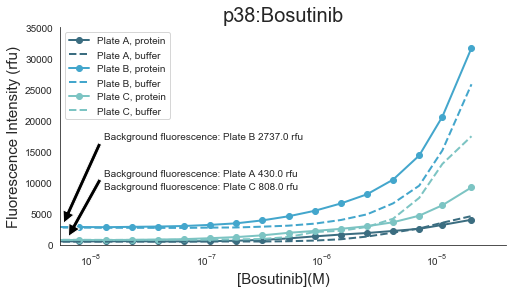

In [5]:
# create figure

# make list for labels
plates_prot = ['Plate A, protein', 'Plate B, protein', 'Plate C, protein']
plates_buff = ['Plate A, buffer', 'Plate B, buffer', 'Plate C, buffer']

index = 0

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[8,4])

current_palette = sns.color_palette('GnBu_d',3)
sns.set_palette(current_palette)

x_values = concentrations

sns.set_palette(current_palette)
sns.set_style(style='white')
sns.despine()

# plot protein traces for each plate type
for plate, label in zip(final_data_prot, plates_prot):
    plt.semilogx(x_values, plate, linewidth=2, marker='o', label='%s' % label);

index += 1

# plot buffer traces for each plate type
        
index = 0
sns.set_palette(current_palette)
for plate, label in zip(final_data_buff, plates_buff):
    plt.semilogx(x_values, plate, linewidth=2, linestyle='--', label='%s' %label)
    
    # annotate background flourescence values
    if label == 'Plate A, buffer':
        m = 'A'
        n = 11000
        plt.annotate('Background fluorescence: Plate %s %s rfu' %(m, final_data_buff[0][0]), xy=(0.000000013, n), xycoords='data')
    elif label == 'Plate B, buffer':
        m = 'B'
        n = 17000
        plt.annotate('Background fluorescence: Plate %s %s rfu' %(m, final_data_buff[1][0]), xy=(0.000000013, n), xycoords='data')
        plt.annotate('', xy=(5.6e-09, final_data_buff[1][0]), xytext=(0.0000000125, 17000), xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='bottom')
    else:
        m = 'C'
        n = 9000
        plt.annotate('Background fluorescence: Plate %s %s rfu' %(m, final_data_buff[2][0]), xy=(0.000000013, n), xycoords='data')
        plt.annotate('', xy=(6.2e-09, final_data_buff[2][0]), xytext=(0.0000000125, 11000), xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='bottom')
        
    
plt.xlim(0,4e-5)
plt.ylim(0,35000)
plt.tick_params(axis='both', which='major', labelsize=12)

# reorder legend labels so protein and buffer are together
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,4,2,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')

plt.title('p38:Bosutinib', fontsize=20)
plt.xlabel('[Bosutinib](M)', fontsize=15)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=10)

index += 1


fig.savefig('20190423_single_well_plate_comparison_rfu.pdf', bbox_inches='tight', dpi=300)